<a href="https://colab.research.google.com/github/V-S-Swetha/essential-amenity/blob/main/essential_amenity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Schools and Hospitals on a Map and Creating Charts

In this code, we demonstrate how to visualize the locations of schools and hospitals on a map and create bar and pie charts to analyze the data. We use the following libraries:

- `geopandas` to load a GeoJSON dataset.
- `folium` to create an interactive map.
- `matplotlib` for creating bar and pie charts.
- `pandas` for data manipulation.

### Loading the GeoJSON Dataset

We start by loading a GeoJSON dataset. Make sure to replace `'export.geojson'` with the path or URL of your dataset.

```python
gdf = gpd.read_file('export.geojson')


Creating an Interactive Map
We create a map centered around Paris using the folium library and initialize variables to count the number of hospitals and schools.



```
m = folium.Map(location=[48.8566, 2.3522],zoom_start=12)

hospitals_count = 0   
     
schools_count = 0
```


Adding Markers to the Map
We iterate through the GeoDataFrame, categorizing places as schools, hospitals, or others. For schools and hospitals, we add markers to the map with Font Awesome icons representing their types.

# For schools


```
icon = 'graduation-cap'

icon = folium.Icon(color=icon_color, icon='fa-' + icon, prefix='fa')
```

# For hospitals


```
icon = 'hospital-symbol'

icon = folium.Icon(color=icon_color, icon='fa-' + icon, prefix='fa')
```


Creating Bar and Pie Charts
We use matplotlib to create bar and pie charts to visualize the counts of schools and hospitals. We also annotate the bars with counts and display the charts.

# Create a bar chart
`plt.bar(df['Type'], df['Count'])`

# Create a pie chart
`plt.pie(df['Count'], labels=df['Type'], autopct='%1.1f%%', startangle=90)`

# Display the plots
`plt.show()`

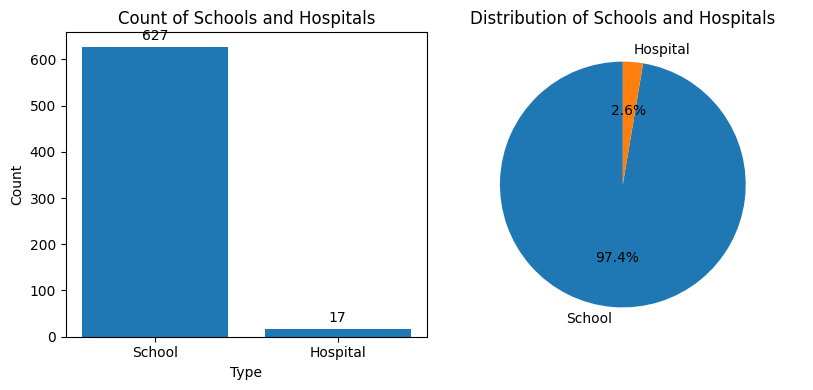

In [ ]:
import geopandas as gpd
import folium
from folium.features import CustomIcon
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON dataset
# Replace 'your_dataset.geojson' with the actual file path or URL of your dataset
gdf = gpd.read_file('export.geojson')

# Create a map centered around Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Create lists to count the number of hospitals and schools
hospitals_count = 0
schools_count = 0

# Lists to store latitude and longitude for a scatter plot
latitude_schools = []
longitude_schools = []
latitude_hospitals = []
longitude_hospitals = []

# Iterate through the GeoDataFrame and add markers to the map
for index, row in gdf.iterrows():
    if row['amenity'] == 'school':
        icon = 'graduation-cap'  # School icon from Font Awesome
        icon_color = 'blue'
        place_type = 'School'
        schools_count += 1
        latitude_schools.append(row['geometry'].y)
        longitude_schools.append(row['geometry'].x)
    elif row['amenity'] == 'hospital':
        icon = 'hospital-symbol'  # Hospital icon from Font Awesome
        icon_color = 'red'
        place_type = 'Hospital'
        hospitals_count += 1
        latitude_hospitals.append(row['geometry'].y)
        longitude_hospitals.append(row['geometry'].x)
    else:
        icon_color = 'gray'
        place_type = 'Other'

    # Create a Font Awesome icon
    icon = folium.Icon(color=icon_color, icon='fa-' + icon, prefix='fa')

    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],  # Extract latitude and longitude from the geometry
        popup=row['name'],  # Replace 'name' with the actual field name for the name of the place
        icon=icon,  # Set marker icon to the Font Awesome icon
        tooltip=place_type  # Add a tooltip to display the place type (hospital or school)
    ).add_to(m)

# Display the map
display(m)

# Create a bar chart with counts displayed
data = {'Type': ['School', 'Hospital'], 'Count': [schools_count, hospitals_count]}
df = pd.DataFrame(data)
plt.figure(figsize=(12, 4))

# Create a subplot for the bar chart
plt.subplot(131)  # Subplot with 1 row, 3 columns, and index 1
bars = plt.bar(df['Type'], df['Count'])  # Create a bar chart with school and hospital counts
plt.xlabel('Type')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Count of Schools and Hospitals')  # Title of the bar chart

# Annotate the bars with counts
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')
    # This loop annotates each bar in the bar chart with its count above the bar.

# Create a pie chart
plt.subplot(132)  # Subplot with 1 row, 3 columns, and index 2
plt.pie(df['Count'], labels=df['Type'], autopct='%1.1f%%', startangle=90)
# Create a pie chart with school and hospital counts, displaying percentages and starting angle at 90 degrees
plt.axis('equal')  # Make the pie chart circular
plt.title('Distribution of Schools and Hospitals')  # Title of the pie chart

# Display the plots
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the bar and pie charts
